# Data Analyst Project : Business Decision Research About Features & PaidStarPerWatchedHour

## Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

## Data Collection

### Load Dataset

In [2]:
dataset = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Python\MyProjects\MAINGAMES Data Analyst\Dataset\Maingames_DS_dataset.csv")
display(dataset.head())

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,ID,Male,MLBB,96751,104,0.004113,0.663442,0.718679,0.288008,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,1,ID,Male,8 Ball Pool,4781,174,0.002855,0.543255,0.427887,0.430609,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,2,ID,Female,Free Fire - Battlegrounds,68246,83,0.003007,0.527279,0.399873,0.753009,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,3,ID,Male,MLBB,142037,127,0.005171,0.677222,0.603534,0.407923,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,4,ID,Male,Free Fire - Battlegrounds,15416,86,0.001213,0.238194,0.543285,0.392993,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125


## Data Preparation

### Dataset Eksploration

In [3]:
print("Dimension of Dataset = %d Rows & %d Columns"%dataset.shape)

Dimension of Dataset = 631 Rows & 127 Columns


### Handling Missing Value

In [4]:
print("Checks Existing of Missing Value Dataset = ?")

missing_values_columns = dataset.columns[dataset.isnull().any()].to_list()
total_missing_values = dataset.isnull().sum().sum()

display(missing_values_columns)
display(total_missing_values)

Checks Existing of Missing Value Dataset = ?


['Gender',
 'Game',
 'Total Follower',
 'PaidStarPerWatchedHour',
 'PaidStarPerWatchedHour.1']

8

In [5]:
dataset = dataset.dropna(subset=missing_values_columns)

print("Checks Existing of Missing Value Dataset = ?")

missing_values_columns = dataset.columns[dataset.isnull().any()].to_list()
total_missing_values = dataset.isnull().sum().sum()

display(missing_values_columns)
display(total_missing_values)

Checks Existing of Missing Value Dataset = ?


[]

0

### Drop Useless Columns

In [6]:
useless_columns = ["Unnamed: 0","PaidStarPerWatchedHour.1"]
dataset = dataset.drop(useless_columns, axis=1)

print("Dimension of Dataset = %d Rows & %d Columns"%dataset.shape)

Dimension of Dataset = 626 Rows & 125 Columns


### Drop Rows Thah Have String "-"

In [7]:
dataset = dataset.drop([450, 508, 534, 439])

### Drop Rows That Have String "250,98"

In [8]:
dataset = dataset.drop([576])

### Reset Index Dataset

In [9]:
dataset = dataset.reset_index(drop=True)

### Split The Columns Into Several Segments

#### Making Label DataFrame

In [10]:
Label = dataset[["PaidStarPerWatchedHour"]]
display(Label.head())

,PaidStarPerWatchedHour
0,0.004113
1,0.002855
2,0.003007
3,0.005171
4,0.001213


#### Making Features DataFrame

In [11]:
Features = dataset.drop(["PaidStarPerWatchedHour"], axis=1)
display(Features.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,Character_Cont_Conscientiousness,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,ID,Male,MLBB,96751,104,0.663442,0.718679,0.288008,0.471456,0.522711,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,ID,Male,8 Ball Pool,4781,174,0.543255,0.427887,0.430609,0.493514,0.348513,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,ID,Female,Free Fire - Battlegrounds,68246,83,0.527279,0.399873,0.753009,0.472405,0.376854,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,ID,Male,MLBB,142037,127,0.677222,0.603534,0.407923,0.467787,0.499234,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,ID,Male,Free Fire - Battlegrounds,15416,86,0.238194,0.543285,0.392993,0.583099,0.469371,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125


#### Split The Features Into Several Segements

In [12]:
Features_columns = Features.columns.to_list()

In [13]:
Character_columns = []
Personal_columns = []
Temperament_columns = []
Self_columns = []
Role_columns = []
Core_columns = []

for column in Features_columns:
    if column.startswith("Character"):
        Character_columns.append(column)
    elif column.startswith("Personal"):
        Personal_columns.append(column)
    elif column.startswith("Temperament"):
        Temperament_columns.append(column)
    elif column.startswith("Self"):
        Self_columns.append(column)
    elif column.startswith("Role"):
        Role_columns.append(column)
    else:
        Core_columns.append(column)

In [14]:
display(len(Character_columns))
display(len(Personal_columns))
display(len(Temperament_columns))
display(len(Self_columns))
display(len(Role_columns))
display(len(Core_columns))

30

23

9

24

32

6

## Data Analysis

### Data Analysis : df_Core_columns 

In [15]:
df_Core_columns = Features[Core_columns]

display(df_Core_columns.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped
0,ID,Male,MLBB,96751,104,INT
1,ID,Male,8 Ball Pool,4781,174,INT
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST
3,ID,Male,MLBB,142037,127,ENT
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF


#### Checking df_Core_columns Informations

In [16]:
print("Dimension of df_Core_dataset = %d Rows & %d Columns"%df_Core_columns.shape)
print("Checking df_Core_columns Information = ?")
display(df_Core_columns.info())
print("Checks Existing of Missing Value = ?")
display(df_Core_columns.isnull().sum())

Dimension of df_Core_dataset = 621 Rows & 6 Columns
Checking df_Core_columns Information = ?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          621 non-null    object
 1   Gender           621 non-null    object
 2   Game             621 non-null    object
 3   Total Follower   621 non-null    object
 4   Broadcast Hours  621 non-null    int64 
 5   MBTI_grouped     621 non-null    object
dtypes: int64(1), object(5)
memory usage: 29.2+ KB


None

Checks Existing of Missing Value = ?


Country            0
Gender             0
Game               0
Total Follower     0
Broadcast Hours    0
MBTI_grouped       0
dtype: int64

#### Change Column "Total Follower" Types

In [17]:
# _list_strip = []
# df_Core_columns_column = df_Core_columns.columns.to_list()
# for i, column in enumerate(df_Core_columns_column):
#     x = df_Core_columns.loc[df_Core_columns[column] == "-"].index.to_list()
#     _list_strip.extend(x)

# _list_strip = list(set(_list_strip))
# display(_list_strip)

In [18]:
# x = df_Core_columns.loc[df_Core_columns["Total Follower"] == '250,98']
# display(x)

In [19]:
df_Core_columns = df_Core_columns.astype({"Total Follower":"int64"})
display(df_Core_columns.dtypes)

Country            object
Gender             object
Game               object
Total Follower      int64
Broadcast Hours     int64
MBTI_grouped       object
dtype: object

#### Making PaidStarPerWatchedHour Columns in df_Core_columns

In [20]:
df_Core = df_Core_columns.copy()
display(df_Core.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped
0,ID,Male,MLBB,96751,104,INT
1,ID,Male,8 Ball Pool,4781,174,INT
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST
3,ID,Male,MLBB,142037,127,ENT
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF


In [21]:
display(Label.head())

,PaidStarPerWatchedHour
0,0.004113
1,0.002855
2,0.003007
3,0.005171
4,0.001213


In [22]:
df_Core = df_Core.join(Label)

In [23]:
display(df_Core.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour
0,ID,Male,MLBB,96751,104,INT,0.004113
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007
3,ID,Male,MLBB,142037,127,ENT,0.005171
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213


#### Data Analysis : Correlation Gender & Label

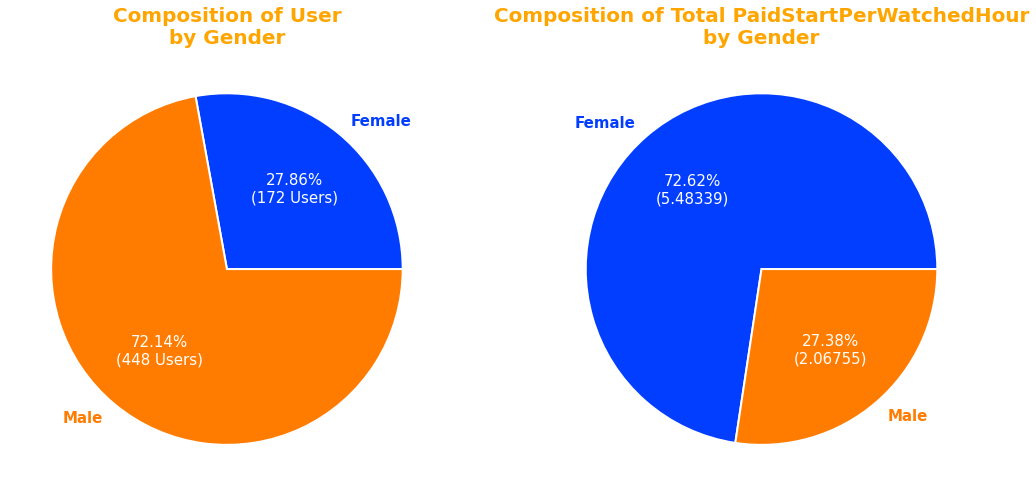

In [24]:
Gender_PaidStartPerWatchedHour = ["Gender","PaidStarPerWatchedHour"]
df_Gender_PaidStartPerWatchedHour = df_Core.groupby(["Gender"]).agg({
                                                                                            "Gender":"count",
                                                                                            "PaidStarPerWatchedHour":"sum"
                                                                                          })
# display(df_Gender_PaidStartPerWatchedHour["Gender"])
# display(df_Gender_PaidStartPerWatchedHour["PaidStarPerWatchedHour"])

def autopct(pct, data, column):
  if column == "Gender":
    absolute_value = int(pct/100*np.sum(data))
    return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
  else:
    absolute_value = float(pct/100*np.sum(data))
    return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(1,2, figsize=(15, 7))
for i, column in enumerate(Gender_PaidStartPerWatchedHour):
    patches, texts, pcts = axs[i].pie(
                                      x=df_Gender_PaidStartPerWatchedHour[column],
                                      labels=df_Gender_PaidStartPerWatchedHour.index,
                                      autopct=lambda pct:autopct(pct, df_Gender_PaidStartPerWatchedHour[column], column),
                                      textprops={
                                                 "size" : 15,
                                                 "color" : "white"
                                                },
                                      wedgeprops={
                                                 "linewidth" : 2,
                                                 "edgecolor" : "white"
                                                },
                                      colors=palette
                                     )
    for y, patch in enumerate(patches):
      texts[y].set_color(patch.get_facecolor())

    axs[0].set_title("Composition of User\nby Gender",fontsize=20, fontweight="bold", color="orange")
    axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby Gender",fontsize=20, fontweight="bold", color="orange")

    plt.setp(texts, fontweight="bold")
    
plt.tight_layout()
plt.show()

#### Data Analysis : Correlation Country & Label

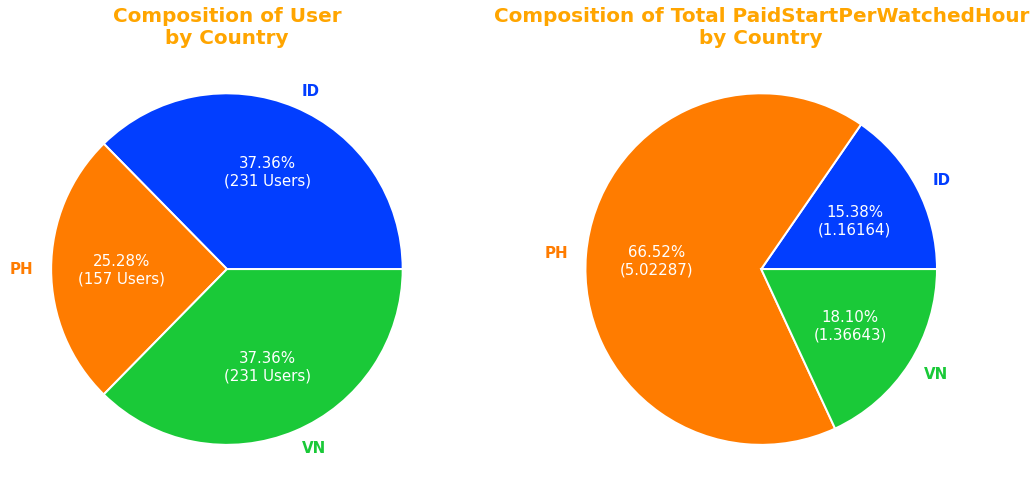

In [25]:
Country_PaidStartPerWatchedHour = ["Country","PaidStarPerWatchedHour"]
df_Country_PaidStartPerWatchedHour = df_Core.groupby(["Country"]).agg({
                                                                                            "Country":"count",
                                                                                            "PaidStarPerWatchedHour":"sum"
                                                                                          })
# display(df_Country_PaidStartPerWatchedHour["Country"])
# display(df_Country_PaidStartPerWatchedHour["PaidStarPerWatchedHour"])

def autopct(pct, data, column):
  if column == "Country":
    absolute_value = int(pct/100*np.sum(data))
    return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
  else:
    absolute_value = float(pct/100*np.sum(data))
    return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(1,2, figsize=(15, 7))
for i, column in enumerate(Country_PaidStartPerWatchedHour):
    patches, texts, pcts = axs[i].pie(
                                      x=df_Country_PaidStartPerWatchedHour[column],
                                      labels=df_Country_PaidStartPerWatchedHour.index,
                                      autopct=lambda pct:autopct(pct, df_Country_PaidStartPerWatchedHour[column], column),
                                      textprops={
                                                 "size" : 15,
                                                 "color" : "white"
                                                },
                                      wedgeprops={
                                                 "linewidth" : 2,
                                                 "edgecolor" : "white"
                                                },
                                      colors=palette
                                     )
    for y, patch in enumerate(patches):
      texts[y].set_color(patch.get_facecolor())

    axs[0].set_title("Composition of User\nby Country",fontsize=20, fontweight="bold", color="orange")
    axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby Country",fontsize=20, fontweight="bold", color="orange")

    plt.setp(texts, fontweight="bold")
    
plt.tight_layout()
plt.show()

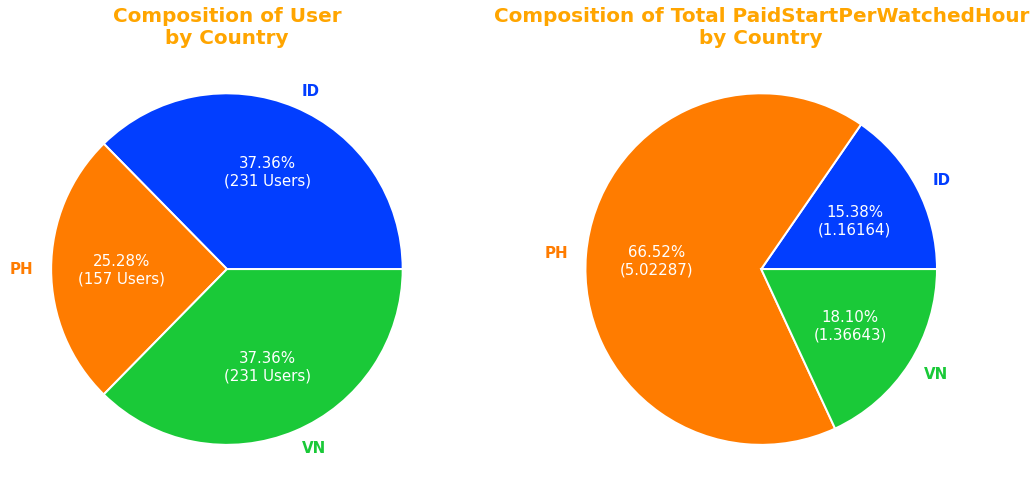

In [26]:
Country_PaidStartPerWatchedHour = ["Country","PaidStarPerWatchedHour"]
df_Country_PaidStartPerWatchedHour = df_Core.groupby(["Country"]).agg({
                                                                                            "Country":"count",
                                                                                            "PaidStarPerWatchedHour":"sum"
                                                                                          })
# display(df_Country_PaidStartPerWatchedHour["Country"])
# display(df_Country_PaidStartPerWatchedHour["PaidStarPerWatchedHour"])

def autopct(pct, data, column):
  if column == "Country":
    absolute_value = int(pct/100*np.sum(data))
    return "{:0.2f}%\n({:d} Users)".format(pct, absolute_value)
  else:
    absolute_value = float(pct/100*np.sum(data))
    return "{:0.2f}%\n({:0.5f})".format(pct, absolute_value)

palette = sns.color_palette("bright")

fig, axs = plt.subplots(1,2, figsize=(15, 7))
for i, column in enumerate(Country_PaidStartPerWatchedHour):
    patches, texts, pcts = axs[i].pie(
                                      x=df_Country_PaidStartPerWatchedHour[column],
                                      labels=df_Country_PaidStartPerWatchedHour.index,
                                      autopct=lambda pct:autopct(pct, df_Country_PaidStartPerWatchedHour[column], column),
                                      textprops={
                                                 "size" : 15,
                                                 "color" : "white"
                                                },
                                      wedgeprops={
                                                 "linewidth" : 2,
                                                 "edgecolor" : "white"
                                                },
                                      colors=palette
                                     )
    for y, patch in enumerate(patches):
      texts[y].set_color(patch.get_facecolor())

    axs[0].set_title("Composition of User\nby Country",fontsize=20, fontweight="bold", color="orange")
    axs[1].set_title("Composition of Total PaidStartPerWatchedHour\nby Country",fontsize=20, fontweight="bold", color="orange")

    plt.setp(texts, fontweight="bold")
    
plt.tight_layout()
plt.show()

#### Data Analysis : Correlation Game & Label

In [32]:
df_Core_games_star = df_Core.copy()
display(df_Core_games_star.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour
0,ID,Male,MLBB,96751,104,INT,0.004113
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007
3,ID,Male,MLBB,142037,127,ENT,0.005171
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213


In [40]:
df_top_game_star = df_Core_games_star.groupby(["Game"])["PaidStarPerWatchedHour"].sum().reset_index().sort_values(by="PaidStarPerWatchedHour", ascending=False).head(10)
display(df_top_game_star)

,Game,PaidStarPerWatchedHour
32,League of Legends,3.182587
36,MLBB,1.421890
45,PUBG,0.812526
20,Dota 2,0.375952
3,Apex Legends,0.296917
58,Valorant,0.218816
28,Grand Theft Auto V,0.179609
25,Free Fire - Battlegrounds,0.117478
29,Green Hell,0.105561
4,Arena of Valor,0.094968


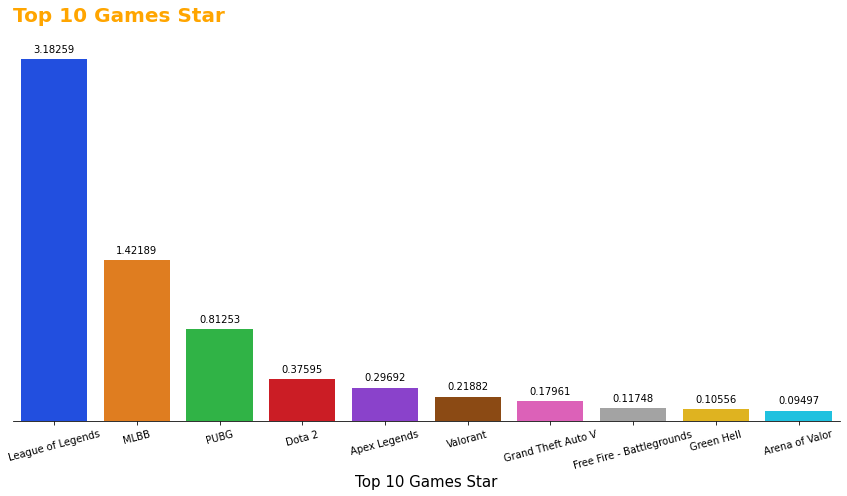

In [56]:
fig, axs = plt.subplots(figsize=(12, 7))
palette = sns.color_palette("bright")
sns.barplot(data=df_top_game_star, x="Game", y="PaidStarPerWatchedHour", palette=palette, ax=axs)
axs.set_title("Top 10 Games Star", fontsize=20, fontweight="bold",color="orange", loc="left", pad=20)
axs.set_xticklabels(axs.get_xticklabels(), rotation=15)
axs.set_xlabel("Top 10 Games Star", fontsize=15)
axs.yaxis.set_visible(False)
axs.set_ylabel(None)
for p in axs.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    axs.annotate(
                 "{:0.5f}".format(height),
                 xy=(x + width/2, height),
                 ha="center",
                 va="center",
                 xytext=(0, 10),
                 textcoords="offset points"
                )
sns.despine(left=True, top=True, right=True)
plt.tight_layout()
plt.show()

In [27]:
df_Core_games = df_Core.copy()
display(df_Core_games.head())

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour
0,ID,Male,MLBB,96751,104,INT,0.004113
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007
3,ID,Male,MLBB,142037,127,ENT,0.005171
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213


##### Making Features top_17_games_popular

In [28]:
top_17_games_popular_columns = df_Core_games["Game"].value_counts().head(17).index.to_list()
display(top_17_games_popular_columns)

['MLBB',
 'PUBG',
 'Free Fire - Battlegrounds',
 'Arena of Valor',
 'League of Legends',
 'Age of Empires',
 'Grand Theft Auto V',
 'Dota 2',
 'Crossfire',
 'Worms Zone',
 'Garena Liên Quân Mobile',
 'Valorant',
 'Wormate.io',
 'Euro Truck Simulator 2',
 'Counter-Strike: Global Offensive',
 'Coin Master',
 'eFootball PES 2020']

In [29]:
df_Core_games["top_17_games"] = df_Core_games["Game"].apply(lambda x : x if x in top_17_games_popular_columns else "Unpopular Game")
display(df_Core_games.head(10))

,Country,Gender,Game,Total Follower,Broadcast Hours,MBTI_grouped,PaidStarPerWatchedHour,top_17_games
0,ID,Male,MLBB,96751,104,INT,0.004113,MLBB
1,ID,Male,8 Ball Pool,4781,174,INT,0.002855,Unpopular Game
2,ID,Female,Free Fire - Battlegrounds,68246,83,IST,0.003007,Free Fire - Battlegrounds
3,ID,Male,MLBB,142037,127,ENT,0.005171,MLBB
4,ID,Male,Free Fire - Battlegrounds,15416,86,ISF,0.001213,Free Fire - Battlegrounds
5,ID,Male,PUBG,8993,136,ENT,0.003492,PUBG
6,ID,Male,8 Ball Pool,3477,96,ENT,0.001151,Unpopular Game
7,ID,Male,PUBG,9321,150,ENT,0.013541,PUBG
8,ID,Female,MLBB,21967,92,IST,0.001085,MLBB
9,ID,Female,Free Fire - Battlegrounds,67213,171,IST,0.002285,Free Fire - Battlegrounds


In [30]:
df_Core_top_17_games = df_Core_games.groupby(["top_17_games"]).agg({
                                                                    "top_17_games":"count",
                                                                    "PaidStarPerWatchedHour":"sum"
                                                                  }).rename(columns={"top_17_games":"count_games"}).sort_values(by="count_games", ascending=False).reset_index()
display(df_Core_top_17_games.head(18)) 

,top_17_games,count_games,PaidStarPerWatchedHour
0,MLBB,150,1.421890
1,PUBG,117,0.812526
2,Unpopular Game,83,0.822428
3,Free Fire - Battlegrounds,49,0.117478
4,Arena of Valor,42,0.094968
5,League of Legends,39,3.182587
6,Age of Empires,26,0.047965
7,Grand Theft Auto V,18,0.179609
8,Dota 2,14,0.375952
9,Crossfire,13,0.044810


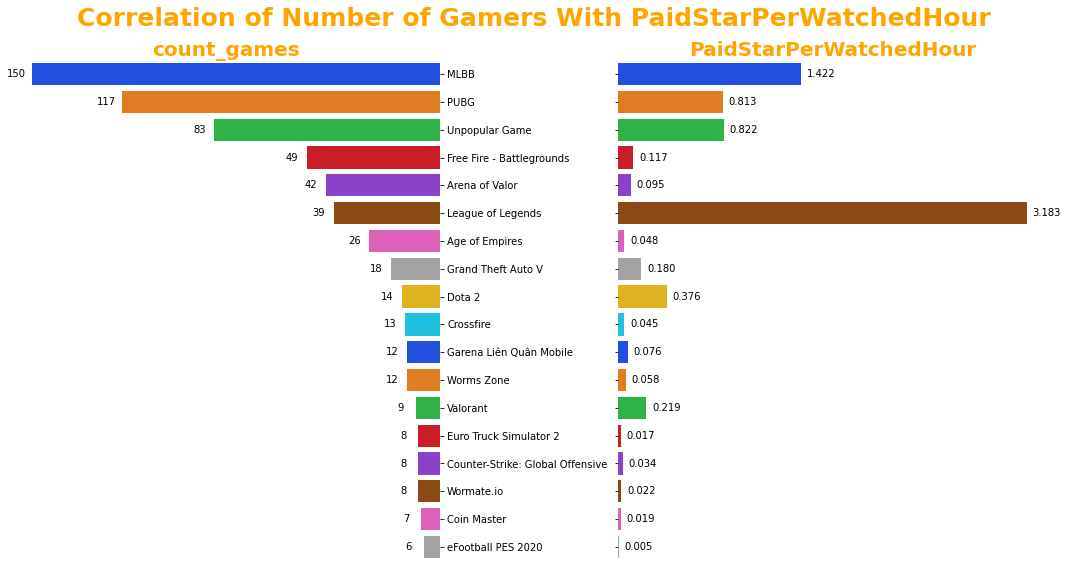

In [31]:
df_Core_top_17_games_columns = ["count_games","PaidStarPerWatchedHour"]
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 8))
fig.suptitle("Correlation of Number of Gamers With PaidStarPerWatchedHour", fontsize=25, fontweight="bold", color="orange")
for i, column in enumerate(df_Core_top_17_games_columns):
    sns.barplot(data=df_Core_top_17_games, x=column, y="top_17_games",palette="bright", ax=axs[i])
    axs[i].tick_params(labelbottom=False, bottom=False)
    if i == 0:
        axs[i].set_xlim(reversed(axs[i].get_xlim()))
        axs[i].yaxis.tick_right()
    axs[i].xaxis.set_label_position("top")
    axs[i].set_xlabel(column, fontsize=20, fontweight="bold", color="orange")
    axs[i].set_ylabel(None)

    for p in axs[i].patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x()
        y = p.get_y()
        if i == 0:
            axs[i].annotate(
                            int(width),
                            xy=(width, y+height/2),
                            ha="center",
                            va="center",
                            xytext=(-15, 0),
                            textcoords="offset points"
                            )
        else:
            axs[i].annotate(
                            "{:0.3f}".format(width),
                            xy=(width, y+height/2),
                            ha="center",
                            va="center",
                            xytext=(20, 0),
                            textcoords="offset points"
                            )
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()